# Tarea Semanal 3: Simulación de un ADC (cuantización) parte 1/2
## Magdalena Noé
En esta tarea simularemos el comportamiento de un ADC y cómo sus parámetros, tamaño de palabra de B bits y frecuencia de muestreo fs afectan a una señal (aproximadamente) analógica.

Para ello se analizará una senoidal con los siguientes parámetros:

- frecuencia f0 arbitraria, por ejemplo f0=fS/N=Δf 
- Amplitud normalizada, es decir unitaria

Luego un bloque cuantizador operara sobre sR con un operador Q, generando una sQ comprendida entre ±VF y con valores discretos establecidos por el paso de cuantización.
Para ello se simulara un ADC de 4, 8 y 16 bits con un rango ±VF = 2

#### Librerias:

In [8]:
import numpy as np
import matplotlib.pyplot as plt #Para la visualizacion de tt y xx.
from numpy.fft import fft #Para poder escribir fft() en vez de numpy.fft.fft()

## Generacion de la señal discreta sR

In [9]:
fs = 1000 # [Hz]
N = fs
fo = fs/N # [Hz]
Vmax = 1 #[Volts]

def mi_funcion_sen(vmax=1,dc=0,ff=1,ph=0,nn=1000,fs=1000):
    t = np.arange(nn) / fs
    sin = vmax * np.sin(t*2*np.pi*ff + ph) + dc
    return t, sin

t,sR = mi_funcion_sen(fs=fs, nn=N, ff=fo, vmax=Vmax)

## Cuantizacion de la señal sQ

In [10]:
Vf = 2 #[Volts] 
q_4 = Vf/2**(4-1)
q_8 = Vf/2**(8-1)
q_16 = Vf/2**(16-1)

def mi_cuantizador(x, Vf, bits):
    q = Vf/2**(bits-1)
    return np.round(x / q) * q

sq_4 = mi_cuantizador(sR, Vf, 4)
sq_8 = mi_cuantizador(sR, Vf, 8)
sq_16 = mi_cuantizador(sR, Vf, 16)

## Graficando las señales

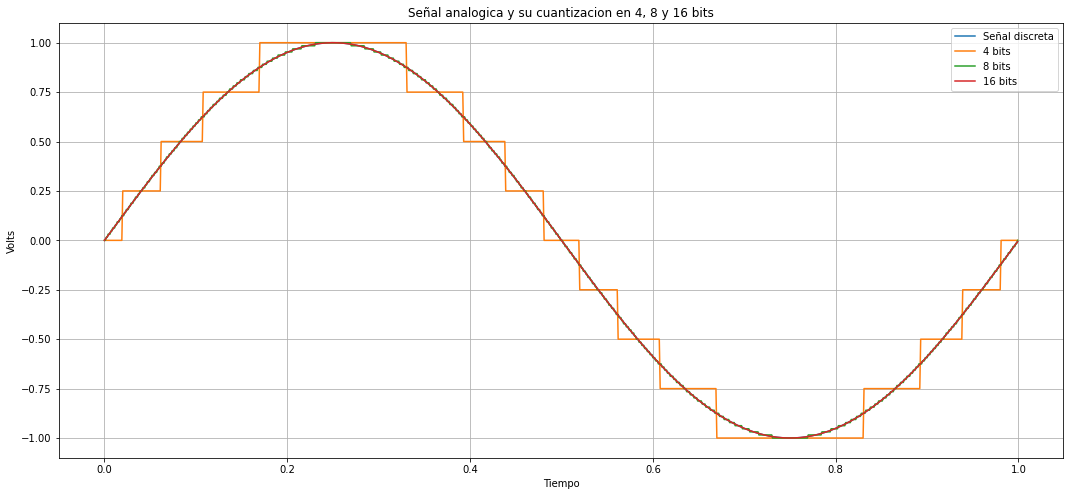

In [ ]:
plt.figure(figsize=(18, 8))
graficar_funcion(t, [sR, sq_4, sq_8, sq_16],["Señal discreta","4 bits","8 bits","16 bits"], "Volts", "Tiempo", "Señal analogica y su cuantizacion en 4, 8 y 16 bits")

## Análisis de error
Se analizará el error de la señal (e = sQ-sR) al ser cuantizada para los 3 casos de 4, 8 y 16 bits. Para ello se graficara la distribución uniforme del error, y se calcularán la media, varianza e incorrelación.

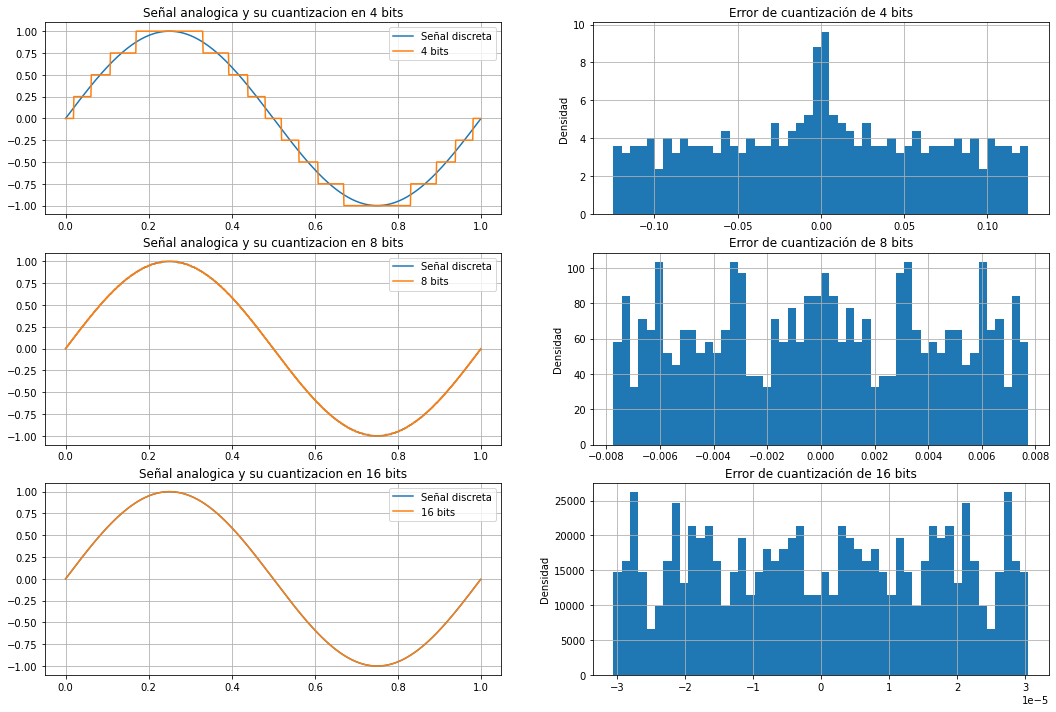

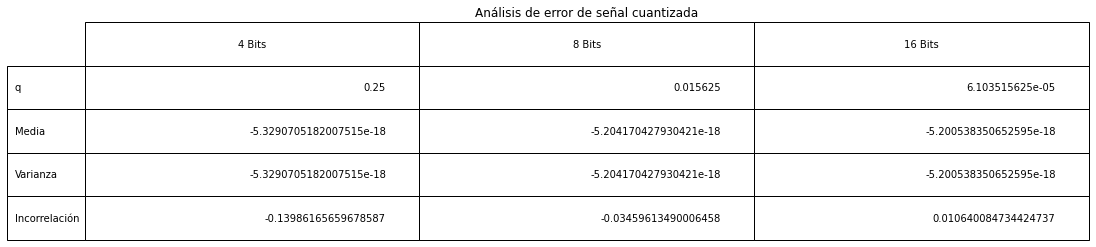

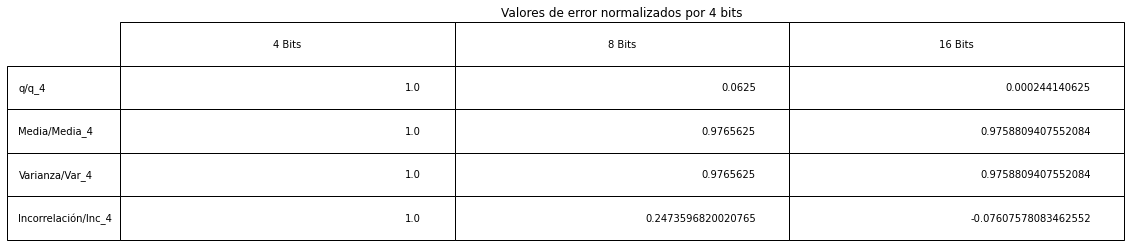

In [74]:

e_4 = sR-sq_4
e_8 = sR-sq_8
e_16 = sR-sq_16

plt.figure(figsize=(18, 12))

'''4 BITS'''
plt.subplot(3,2,1)
graficar_funcion(t, [sR, sq_4],["Señal discreta","4 bits"], titulo="Señal analogica y su cuantizacion en 4 bits", show=0)
plt.subplot(3,2,2)
graficar_error(e_4,"Error de cuantización de 4 bits")

'''8 BITS'''
plt.subplot(3,2,3)
graficar_funcion(t, [sR, sq_8],["Señal discreta","8 bits"], titulo="Señal analogica y su cuantizacion en 8 bits", show=0)
plt.subplot(3,2,4)
graficar_error(e_8,"Error de cuantización de 8 bits")

'''16 BITS'''
plt.subplot(3,2,5)
graficar_funcion(t, [sR, sq_16],["Señal discreta","16 bits"], titulo="Señal analogica y su cuantizacion en 16 bits", show=0)
plt.subplot(3,2,6)
graficar_error(e_16,"Error de cuantización de 16 bits")

'''Tabla'''
media_4 = np.mean(e_4)
media_8 = np.mean(e_8)
media_16 = np.mean(e_16)

var_4 = np.mean(e_4)
var_8 = np.mean(e_8)
var_16 = np.mean(e_16)

inc_4 = np.corrcoef(e_4, sR)[0, 1]
inc_8 = np.corrcoef(e_8, sR)[0, 1]
inc_16 = np.corrcoef(e_16, sR)[0, 1]

plt.figure(figsize=(18, 4))
q = [q_4, q_8, q_16] # Los redondeo a 5 valores detraz de la coma
medias = [media_4, media_8, media_16]
vars = [var_4, var_8, var_16]
inc = [inc_4, inc_8, inc_16]
valores = q, medias, vars, inc
rows = ["q", "Media", "Varianza", "Incorrelación"]
cols = ["4 Bits","8 Bits","16 Bits"]
plt.table(cellText=valores, rowLabels=rows, colLabels=cols, loc='center', bbox=[0,0,1,1])
plt.axis('off')  # Remuevo los ejes para que solo este la tabla
plt.title("Análisis de error de señal cuantizada")
plt.show()


plt.figure(figsize=(18, 4))
q = np.divide(q, q_4)
medias = np.divide(medias, media_4)
vars = np.divide(vars, var_4)
inc = np.divide(inc, inc_4)
valores = q, medias, vars, inc
rows = ["q/q_4", "Media/Media_4", "Varianza/Var_4", "Incorrelación/Inc_4"]
cols = ["4 Bits","8 Bits","16 Bits"]
plt.table(cellText=valores, rowLabels=rows, colLabels=cols, loc='center', bbox=[0,0,1,1])
plt.axis('off')  # Remuevo los ejes para que solo este la tabla
plt.title("Valores de error normalizados por 4 bits")
plt.show()


Se puede apreciar como el valor que mas varia ante un aumento de bits del ADC es la incorrelación, con el cual se aprecia la calida de definición de la señal cuantificada en relacion a la analógica.

### Funciones graficadoras
Funciones utilizadas para realizar los graficos

In [75]:
def graficar_error(error, titulo=""):
    plt.hist(error, bins=50, density=True)
    plt.title(titulo)
    #plt.xlabel("Error")
    plt.ylabel("Densidad")
    plt.grid(True)
    return


def graficar_funcion(abs,ord,leg="",label_y="",label_x="",titulo="",xlim=0,show=1):
    for k in np.arange(len(ord)):
        plt.plot(abs, ord[k], label=leg[k])
    if(xlim):
        plt.xlim(0, xlim)
    else:
        plt.axis('tight')

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(titulo)
    plt.grid()
    plt.legend()
    if(show): #Para manejar subplots por fuera de la funcion
        plt.show()
    return